Search Engine Using Tools & Agents

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

groq_api_key= os.getenv("GROQ_API_KEY")
os.environ['HF_TOKEN'] = os.getenv("HF_TOKEN")

from langchain_groq import ChatGroq
model = ChatGroq(model="llama-3.1-8b-instant", api_key=groq_api_key)


from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")


d:\Langchain\chainvenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

wiki_api_wrapper = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=1000)
wiki = WikipediaQueryRun(api_wrapper=wiki_api_wrapper)

arxiv_api_wrapper = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=1000)
arxiv = ArxivQueryRun(api_wrapper=arxiv_api_wrapper)


In [3]:
tools = [wiki, arxiv]

In [4]:
#Custom Tools

from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

documents= WebBaseLoader(web_path="https://docs.smith.langchain.com/").load()
chunks= RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200).split_documents(documents)
faiss = FAISS.from_documents(chunks, embeddings)
retriever = faiss.as_retriever()

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [5]:
from langchain_core.tools.retriever import create_retriever_tool

smith_tool = create_retriever_tool(retriever, name="langsmith_retriever_tool", description="RAG tool of LangSmith document")
smith_tool

Tool(name='langsmith_retriever_tool', description='RAG tool of LangSmith document', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x0000023D454D60E0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000023D1B90C220>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x0000023D4374A7A0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000023D1B90C220>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), do

In [6]:
tools.append(smith_tool)

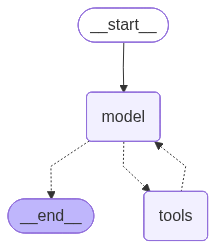

In [7]:
#creating agents for the inbuilt and custom tools

from langchain.agents import create_agent

agent = create_agent(model, tools=tools)
agent

In [8]:
agent.invoke(
    {"messages": [{"role": "user", "content": "What is langsmith"}]}
)

BadRequestError: Error code: 400 - {'error': {'message': "tool call validation failed: attempted to call tool 'brave_search' which was not in request.tools", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<function=brave_search>{"query": "LLM applications in education"}</function>'}}